<a href="https://colab.research.google.com/github/Muhammad-Abdullah-Jami/UK_Bank_Stocks_Prediction/blob/main/Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of essential Libraries**

In [42]:
#!pip install yfinance
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzf ta-lib-0.4.0-src.tar.gz
# !cd ta-lib/ && ./configure --prefix=/usr && make && make install
# !pip install ta-lib
!pip install pandas-ta



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ef4774fdc27e15046aa2435c817ba026ad0e8233ca7045e4109a9692d118ff7c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


**Importing Libraries**

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import talib as ta


**Data Loading and preprocessing**

In [6]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Display the first few rows of the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,596.000000,607.700012,584.099976,606.400024,501.606262,4442051
2019-01-03,596.599976,610.799988,582.700012,586.700012,485.310577,7359146
2019-01-04,597.400024,611.200012,596.000000,607.799988,502.764282,7283237
2019-01-07,606.900024,609.599976,590.900024,594.599976,491.845459,7184535
2019-01-08,596.799988,623.500000,593.599976,613.000000,507.065704,7575939


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1261 non-null   float64
 1   High       1261 non-null   float64
 2   Low        1261 non-null   float64
 3   Close      1261 non-null   float64
 4   Adj Close  1261 non-null   float64
 5   Volume     1261 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.0 KB


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,567.368439,575.304779,560.508252,567.990634,512.525411,7.753292e+06
std,110.558282,111.080875,110.804058,111.144439,104.083527,3.894145e+06
min,340.700012,346.862000,334.250000,336.799988,299.323334,6.793360e+05
25%,465.700012,473.700012,459.200012,466.100006,419.479340,5.175427e+06
50%,586.799988,593.000000,578.599976,585.599976,521.905212,6.721285e+06
75%,659.599976,667.200012,654.200012,661.000000,590.401428,9.140959e+06
max,790.400024,799.400024,784.400024,790.799988,750.497864,3.080891e+07


In [39]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Feature Engineering**

In [43]:
import pandas_ta as ta
# Simple Moving Average (SMA)
df['SMA_14'] = df.ta.sma(close=df['Close'], length=14)


ValueError: too many values to unpack (expected 3)

In [25]:
X= df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y= df['Close'].values
y_binned = np.digitize(y, bins=np.linspace(y.min(), y.max(), 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(f'mean_squared_error:{mse}')
feature_importances = rf_model.feature_importances_
print("Feature Importances: ", feature_importances)


mean_squared_error:24.72540575015646
Feature Importances:  [6.88200536e-04 1.04248568e-01 8.43179669e-01 5.17192452e-02
 1.64317540e-04]


Accuracy: 0.9367588932806324
F1 Score: 0.9367828165286528


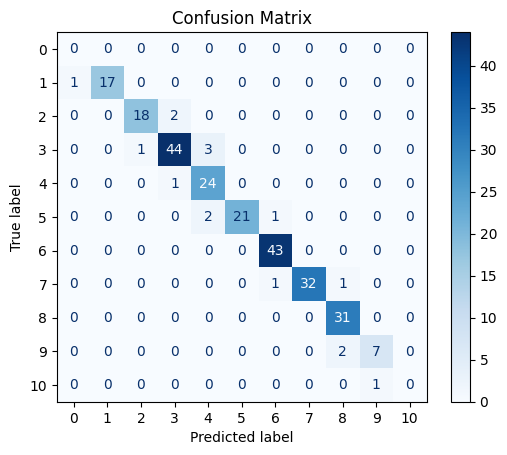

In [29]:
# Assuming you've already binned y_train earlier
# Bin continuous y_test and y_pred into discrete labels
bins = np.linspace(y_test.min(), y_test.max(), 10)  # Same number of bins as before

y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Calculate accuracy and F1 score using the binned values
accuracy = accuracy_score(y_test_binned, y_pred_binned)
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**Extra code for better isight for data or preprocessing or model**

In [ ]:
# Calculating the number of years
start_year = df.index[0].year
end_year = df.index[-1].year
years_of_data = end_year - start_year + 1

print(f"Years of data: {years_of_data}")


In [4]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
stock = yf.Ticker(ticker)

#Stock metadata
metadata = stock.info
metadata


{'address1': '1 Basinghall Avenue',
 'city': 'London',
 'zip': 'EC2V 5DD',
 'country': 'United Kingdom',
 'phone': '44 20 7885 8888',
 'fax': '44 20 7885 9999',
 'website': 'https://www.sc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Standard Chartered PLC, together with its subsidiaries, provides various banking products and services in Asia, Africa, the Middle East, Europe, and the Americas. The company operates in three segments: Corporate, Commercial & Institutional Banking; Consumer, Private & Business Banking; and Ventures. It offers retail products, such as deposits, mortgages, credit cards, and personal loans; wealth management products and services that include investments, portfolio management, insurance, and wealth advice; and transaction banking services, such as cash mana